# Load Data

In [21]:
import numpy as np
import math
filename='/Users/wendy/Documents/2017 Fall/CS 534/homework1/spam-dataset/train-features.txt'
train_feature = np.loadtxt(filename)  
filename='/Users/wendy/Documents/2017 Fall/CS 534/homework1/spam-dataset/test-features.txt'
test_feature = np.loadtxt(filename)

filename='/Users/wendy/Documents/2017 Fall/CS 534/homework1/spam-dataset/train-labels.txt'
file=open(filename, 'r')
train_label = file.read().split('\n')
train_label.pop()
filename='/Users/wendy/Documents/2017 Fall/CS 534/homework1/spam-dataset/test-labels.txt'
file=open(filename, 'r')
test_label = file.read().split('\n')
test_label.pop()


''

# Function to calculate Err and AUC

In [3]:
def err_AUC():
    err=0
    for i in range(len(predictions)):
        if predictions[i]!=test_label[i]:
            err+=1
    label=[]
    for i in test_label:
        i=int(i)
        label.append(i)
    auc = roc_auc_score(label,score[:,1])
    return err, auc

# Z-score Normalization

Error for standard Logistic Regression is: 9 AUC for standard Logistic Regression is: 0.988343195266


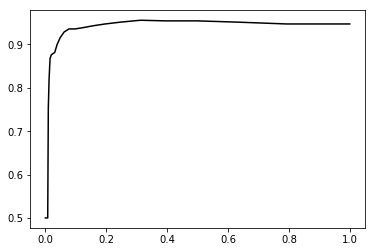

Based on 5-fold CV, the best parameter is: 0.312571584969
Error for Lasso is: 5 AUC for Lasso is: 0.999201183432


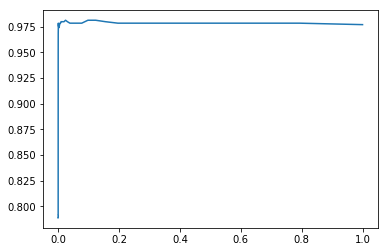

Based on 5-fold CV, the best parameter is: 0.0242012826479
Error for Ridge is: 4 AUC for Ridge is: 0.999053254438


In [23]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
######matrix transformation#######
train_matrix=np.zeros((700,2500))
test_matrix=np.zeros((260,2500))
for line in train_feature:
    train_matrix[int(line[0])-1][int(line[1])-1]=line[2]
for line in test_feature:
    test_matrix[int(line[0])-1][int(line[1])-1]=line[2]
######z-score regulization#######
for i in range(len(train_matrix[0])):
    mu=np.average(train_matrix[:,i])
    sigma=np.std(train_matrix[:,i])
    for j in range(len(train_matrix)):
        if sigma!=0:
            train_matrix[j,i] = ( train_matrix[j,i] - mu) / sigma 

for i in range(len(test_matrix[0])):
    mu=np.average(test_matrix[:,i])
    sigma=np.std(test_matrix[:,i])
    for j in range(len(test_matrix)):
        if sigma!=0:
            test_matrix[j,i] = ( test_matrix[j,i] - mu) / sigma 
            
######Standard Logistic Regression#########
classifier=LogisticRegression(C=1000000000000)
classifier.fit(train_matrix,train_label)
predictions=classifier.predict(test_matrix)
predict_proba=classifier.predict_proba(test_matrix)
score=np.array(predict_proba)
err_standard,AUC_standard=err_AUC()
print 'Error for standard Logistic Regression is:',err_standard,'AUC for standard Logistic Regression is:',AUC_standard
#######LASSO Logistic Regression###########
lamlist=list(np.logspace(-10,0,100))
result=[]
best_lambda=0
best_score=0
for i in lamlist:
    classifier=LogisticRegression(penalty='l1',C=i)
    scores = cross_val_score(classifier, train_matrix, train_label, cv=5)
    result.append(np.mean(scores))
    if np.mean(scores)>best_score:
        best_score=np.mean(scores)
        best_lambda=i
plt.plot(lamlist,result,'k')
plt.show()
print 'Based on 5-fold CV, the best parameter is:', best_lambda
classifier=LogisticRegression(penalty='l1',C=best_lambda)
classifier.fit(train_matrix,train_label)
predictions=classifier.predict(test_matrix)
predict_proba=classifier.predict_proba(test_matrix)
score=np.array(predict_proba)
err_lasso,AUC_lasso=err_AUC()
print 'Error for Lasso is:',err_lasso,'AUC for Lasso is:',AUC_lasso
#########Ridge Logistic Regression#######
result=[]
best_lambda=0
best_score=0
for i in lamlist:
    classifier=LogisticRegression(penalty='l2',C=i)
    scores = cross_val_score(classifier, train_matrix, train_label, cv=5)
    result.append(np.mean(scores))
    if np.mean(scores)>best_score:
        best_score=np.mean(scores)
        best_lambda=i
plt.plot(lamlist,result)
plt.show()
print 'Based on 5-fold CV, the best parameter is:', best_lambda
classifier=LogisticRegression(penalty='l2',C=best_lambda)
classifier.fit(train_matrix,train_label)
predictions=classifier.predict(test_matrix)
predict_proba=classifier.predict_proba(test_matrix)
score=np.array(predict_proba)
err_ridge,AUC_ridge=err_AUC()
print 'Error for Ridge is:',err_ridge,'AUC for Ridge is:',AUC_ridge

# Frequency Normalization


Error for standard Logistic Regression is: 3 AUC for standard Logistic Regression is: 0.999585798817


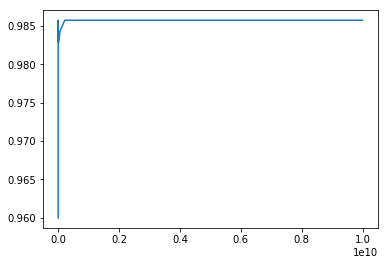

Based on 5-fold CV, the best parameter is: 1291549.66501
Error for Lasso is: 3 AUC for Lasso is: 0.999644970414


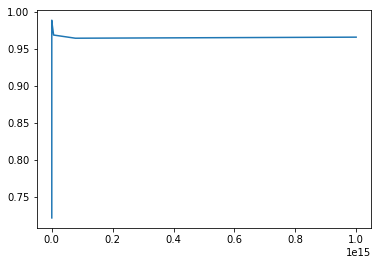

Based on 5-fold CV, the best parameter is: 2782559402.21
Error for Ridge is: 1 AUC for Ridge is: 0.999822485207


In [19]:
train_matrix=np.zeros((700,2500))
test_matrix=np.zeros((260,2500))
  
for line in train_feature:
    train_matrix[int(line[0])-1][int(line[1])-1]=line[2]
for line in test_feature:
    test_matrix[int(line[0])-1][int(line[1])-1]=line[2]

train_total_freq=0
for i in train_matrix:
    train_total_freq+=sum(i)

test_total_freq=0
for i in test_matrix:
    test_total_freq+=sum(i)

for line in train_feature:
    train_matrix[int(line[0])-1][int(line[1])-1]=line[2]/train_total_freq
for line in test_feature:
    test_matrix[int(line[0])-1][int(line[1])-1]=line[2]/test_total_freq
######Standard Logistic Regression#########
classifier=LogisticRegression(C=100000000000)
classifier.fit(train_matrix,train_label)
predictions=classifier.predict(test_matrix)
predict_proba=classifier.predict_proba(test_matrix)
score=np.array(predict_proba)
err_standard,AUC_standard=err_AUC()
print 'Error for standard Logistic Regression is:',err_standard,'AUC for standard Logistic Regression is:',AUC_standard
#######LASSO Logistic Regression###########
lamlist=list(np.logspace(5,10,10))
result=[]
best_lambda=0
best_score=0
for i in lamlist:
    classifier=LogisticRegression(penalty='l1',C=i)
    scores = cross_val_score(classifier, train_matrix, train_label, cv=5)
    result.append(np.mean(scores))
    if np.mean(scores)>best_score:
        best_score=np.mean(scores)
        best_lambda=i
plt.plot(lamlist,result)
plt.show()
print 'Based on 5-fold CV, the best parameter is:', best_lambda
classifier=LogisticRegression(penalty='l1',C=best_lambda)
classifier.fit(train_matrix,train_label)
predictions=classifier.predict(test_matrix)
predict_proba=classifier.predict_proba(test_matrix)
score=np.array(predict_proba)
err_lasso,AUC_lasso=err_AUC()
print 'Error for Lasso is:',err_lasso,'AUC for Lasso is:',AUC_lasso
#########Ridge Logistic Regression#######
lamlist=list(np.logspace(5,15,10))
result=[]
best_lambda=0
best_score=0
for i in lamlist:
    classifier=LogisticRegression(penalty='l2',C=i)
    scores = cross_val_score(classifier, train_matrix, train_label, cv=5)
    result.append(np.mean(scores))
    if np.mean(scores)>best_score:
        best_score=np.mean(scores)
        best_lambda=i
plt.plot(lamlist,result)
plt.show()
print 'Based on 5-fold CV, the best parameter is:', best_lambda
classifier=LogisticRegression(penalty='l2',C=best_lambda)
classifier.fit(train_matrix,train_label)
predictions=classifier.predict(test_matrix)
predict_proba=classifier.predict_proba(test_matrix)
score=np.array(predict_proba)
err_ridge,AUC_ridge=err_AUC()
print 'Error for Ridge is:',err_ridge,'AUC for Ridge is:',AUC_ridge

# Log Normalization

Error for standard Logistic Regression is: 18 AUC for standard Logistic Regression is: 0.973431952663


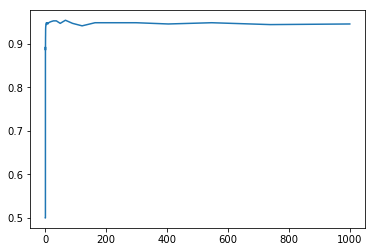

Based on 5-fold CV, the best parameter is: 65.7933224658
Error for Lasso is: 8 AUC for Lasso is: 0.99798816568


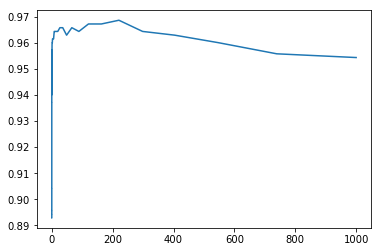

Based on 5-fold CV, the best parameter is: 220.51307399
Error for Ridge is: 8 AUC for Ridge is: 0.995857988166


In [18]:
train_matrix=np.zeros((700,2500))
test_matrix=np.zeros((260,2500))
for line in train_feature:
    train_matrix[int(line[0])-1][int(line[1])-1]=math.log(line[2]+0.1)
for line in test_feature:
    test_matrix[int(line[0])-1][int(line[1])-1]=math.log(line[2]+0.1)

######Standard Logistic Regression#########
classifier=LogisticRegression(C=100000000000000)
classifier.fit(train_matrix,train_label)
predictions=classifier.predict(test_matrix)
predict_proba=classifier.predict_proba(test_matrix)
score=np.array(predict_proba)
err_standard,AUC_standard=err_AUC()
print 'Error for standard Logistic Regression is:',err_standard,'AUC for standard Logistic Regression is:',AUC_standard
#######LASSO Logistic Regression###########
lamlist=list(np.logspace(-10,3,100))
result=[]
best_lambda=0
best_score=0
for i in lamlist:
    classifier=LogisticRegression(penalty='l1',C=i)
    scores = cross_val_score(classifier, train_matrix, train_label, cv=5)
    result.append(np.mean(scores))
    if np.mean(scores)>best_score:
        best_score=np.mean(scores)
        best_lambda=i
plt.plot(lamlist,result)
plt.show()
print 'Based on 5-fold CV, the best parameter is:', best_lambda
classifier=LogisticRegression(penalty='l1',C=best_lambda)
classifier.fit(train_matrix,train_label)
predictions=classifier.predict(test_matrix)
predict_proba=classifier.predict_proba(test_matrix)
score=np.array(predict_proba)
err_lasso,AUC_lasso=err_AUC()
print 'Error for Lasso is:',err_lasso,'AUC for Lasso is:',AUC_lasso
#########Ridge Logistic Regression#######
result=[]
best_lambda=0
best_score=0
for i in lamlist:
    classifier=LogisticRegression(penalty='l2',C=i)
    scores = cross_val_score(classifier, train_matrix, train_label, cv=5)
    result.append(np.mean(scores))
    if np.mean(scores)>best_score:
        best_score=np.mean(scores)
        best_lambda=i
plt.plot(lamlist,result)
plt.show()
print 'Based on 5-fold CV, the best parameter is:', best_lambda
classifier=LogisticRegression(penalty='l2',C=best_lambda)
classifier.fit(train_matrix,train_label)
predictions=classifier.predict(test_matrix)
predict_proba=classifier.predict_proba(test_matrix)
score=np.array(predict_proba)
err_ridge,AUC_ridge=err_AUC()
print 'Error for Ridge is:',err_ridge,'AUC for Ridge is:',AUC_ridge

Table for err-rate

|         |Standard Logistic|LASSO Logistic| Ridge Logistic|
| ------------- |:-------------:| ---------:|
|Z-score Normalization|0.0346|0.0192|0.0154|
| Frequence Normalization|0.0115|0.0115|0.0038|
| log Normalization|0.0692|0.0308|0.0308|


Table for AUC

|         |Standard Logistic|LASSO Logistic| Ridge Logistic|
| ------------- |:-------------:| ---------:|
|Z-score Normalization|0.9883|0.9990|0.9993|
| Frequence Normalization|0.9995|0.9996|0.9998|
| log Normalization|0.973|0.998|0.996|



Comment：
Overall, in all three nomalizaiton methods, Logistic regression with LASSO and Ridge have a better performance compared to standard logistic. In Z-score and Frequency normalization, Ridge has a lower error rate and higher AUC than LASSO and in log normalizaiton, LASSO and Ridge have same err-rate and LASSO has a higher AUC.


In [2]:
import tensorflow as tf
import sklearn

ImportError: cannot import name __check_build